# decision trees

In [75]:
import pandas as pd
df = pd.read_csv('wine.csv')
df.info()
df.head(111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510
107,2,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
108,2,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
109,2,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680


In [44]:
df.head()
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

import numpy as np
from sklearn.model_selection import train_test_split
#rs = np.random.RandomState(123) # doesn't work with DecisionTreeClassifier.
rs = 123
train_prop = 0.7   
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_prop, random_state=rs)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth=3,criterion='gini',random_state=rs)
model.fit(X_train, y_train)
print(accuracy_score(model.predict(X_train), y_train))
print(accuracy_score(model.predict(X_test), y_test))

0.9838709677419355
0.9444444444444444


# ensembles

## random forests (bagging)

In [81]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=rs).fit(X_train,y_train)

accuracy_score(model_rf.predict(X_test), y_test)

0.9814814814814815

## boosting (ada)

In [90]:
from sklearn.ensemble import AdaBoostClassifier
model_b = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, criterion='entropy'),
                           n_estimators=1000, random_state=rs)
model_b.fit(X_train, y_train)
y_pred = model_b.predict(X_test)
accuracy_score(y_pred, y_test)

0.9629629629629629

## metrics

In [91]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.90      0.95        20
           3       1.00      1.00      1.00        22

    accuracy                           0.96        54
   macro avg       0.95      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



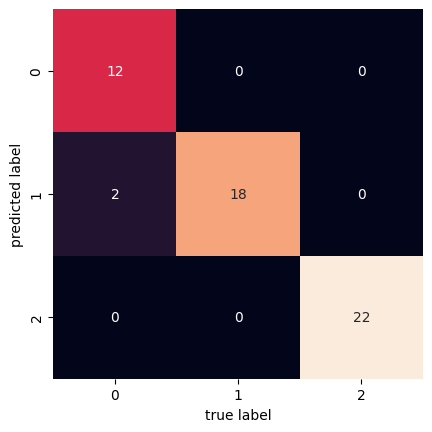

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# log-reg

In [46]:
from sklearn.linear_model import LogisticRegression
logistic_mod = LogisticRegression(penalty='l2', solver='liblinear').fit(X_train, y_train)

print(f'Train Accuracy: {accuracy_score(logistic_mod.predict(X_train), y_train)}')
print(f'Test Accuracy: {accuracy_score(logistic_mod.predict(X_test), y_test)}')

Train Accuracy: 0.9758064516129032
Test Accuracy: 0.9444444444444444


# svm

In [61]:
from sklearn import svm

svc_lin_mod = svm.SVC(kernel="linear").fit(X_train, y_train)
svc_rbf_mod = svm.SVC(kernel="rbf", gamma=0.7).fit(X_train, y_train)

print(f'Linear SVC Train Accuracy: {accuracy_score(svc_lin_mod.predict(X_train), y_train)}')
print(f'Linear SVC Test Accuracy: {accuracy_score(svc_lin_mod.predict(X_test), y_test)}')

print(f'Radial SVC Train Accuracy: {accuracy_score(svc_rbf_mod.predict(X_train), y_train)}')
print(f'Radial SVC Test Accuracy: {accuracy_score(svc_rbf_mod.predict(X_test), y_test)}')


Linear SVC Train Accuracy: 1.0
Linear SVC Test Accuracy: 0.9814814814814815
Radial SVC Train Accuracy: 1.0
Radial SVC Test Accuracy: 0.3333333333333333


In [53]:
svc_poly_mod = svm.SVC(kernel="poly", degree=1).fit(X_train, y_train)

print(f'Polynomial SVC Train Accuracy: {accuracy_score(svc_poly_mod.predict(X_train), y_train)}')
print(f'Polynomial SVC Test Accuracy: {accuracy_score(svc_poly_mod.predict(X_test), y_test)}')

Polynomial SVC Train Accuracy: 0.7258064516129032
Polynomial SVC Test Accuracy: 0.5555555555555556


In [57]:
accuracy_score(svm.LinearSVC(max_iter=10000).fit(X_train, y_train).predict(X_train), y_train)

0.9919354838709677

In [62]:
accuracy_score(svm.LinearSVC(max_iter=10000).fit(X_train, y_train).predict(X_test), y_test)

0.9259259259259259